 ### This Assignment is being conducted by Yichen Wang and Scott Curtis - COMP47670 Data Science in Python

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from bs4 import BeautifulSoup
import requests

# (I)Scraping the data(choosing the bars and restaurants reviews)

### get the name of the bars and their link

In [3]:
source = requests.get("http://mlg.ucd.ie/modules/yalp/bars_list.html").text
soup = BeautifulSoup(source,"lxml")
bars_list = []
for place in soup.find_all("h6"):
    bar_names = place.a.text
    bars_list.append(bar_names)
print(bars_list)

All_link = []
for link in soup.find_all(href = True):
    All_link.append(link["href"])

bars_link = []
for i in All_link:
    if i[0] == "r":
        bars_link.append(i)
print(bars_link)
    


["Applebee's Neighborhood Grill & Bar", 'Bar George', 'Barrel Grill & Modern Saloon', 'Blaqcat Ultra Hookah Lounge', 'Blu Burger Grille', 'Boca Taqueria', 'Boondocks Patio & Grill', 'Boston Pizza', 'Buck & Badger', 'Buffalo Wild Wings', 'Cabin Fever', 'California Pizza Kitchen at Summerlin', "Chalker's Pub Billiards & Bistro", "Chili's", 'Condado Tacos', 'Dark Horse Sports Bar & Grill', 'Ellis Island Hotel, Casino & Brewery', 'Fly 2.0', 'Furco', 'Game Time Sports Grill', 'George & Dragon II English Restaurant Pub', 'Goldwater Brewing', "Gray's Tied House", 'JangBang Bar&Grill', "Jodi B's Restaurant", 'Kirks Korner', 'La PiÃ±ata', 'Latitude 360', 'Laziza Hookah Lounge & Restaurant', 'Le Diner Frunchroom', "Let's Be Frank", "Mac's Speed Shop", 'Midtown', 'Outback Steakhouse', 'Paloma Family Restaurant', 'Park Place Pub', "Pepper's Cafe", 'Piazza Lounge', 'Pireas', 'Primanti Bros', 'Primo Tuscan Grille', 'Roma Italian Restaurant and Pizzeria', 'Saltlik Calgary', 'Scorpion Bay Grill', "Scr

In [4]:
df_bar = pd.DataFrame({'Name_of_the_bar': [],
                        'review_date': [],
                        'reviewer_name': [],
                        'review_star': [],
                        'review_content': [],
                        })

for i in range(len(bars_list)):

    source = requests.get("http://mlg.ucd.ie/modules/yalp/"+ bars_link[i]).text
    soup = BeautifulSoup(source,"lxml")

    #get the list of review date
    review_date_list = []
    for review in soup.find_all('div',class_='review'):
        review_date = review.find('p',class_="review-top").b.text
        review_date_list.append(review_date[12:])    
    

    #get the list of the reviewers
    reviewer_name_list = []
    for review in soup.find_all('div',class_='review'):
        review_name = review.find('p',class_="review-top").i.text
        reviewer_name_list.append(review_name)

    #get the list of review scores(stars)
    review_star_list = []
    for review in soup.find_all('div',class_='review'):
        review_stars = review.find('img', alt=True)
        review_star_list.append(review_stars['alt'][0])
    

    #get the list of contents
    review_content_list = []
    for review in soup.find_all('div',class_='review'):
        review_content = review.find('p',class_="text").text
        review_content_list.append(review_content)

    df1 = pd.DataFrame({'Name_of_the_bar': [bars_list[i] for l in range(len(review_date_list))],
                            'review_date': review_date_list,
                            'reviewer_name': reviewer_name_list,
                            'review_star': review_star_list,
                            'review_content': review_content_list,

                       })


    df_bar = pd.concat([df_bar,df1])
    
df_bar = df_bar.reset_index()
df_bar.head()



,index,Name_of_the_bar,review_date,reviewer_name,review_star,review_content
0,0,Applebee's Neighborhood Grill & Bar,2017-12-03,Michael Stacy,3,It would help if the front girl don't just sit...
1,1,Applebee's Neighborhood Grill & Bar,2017-10-07,Shara Dycus,1,One star because that's the least amount you c...
2,2,Applebee's Neighborhood Grill & Bar,2017-09-20,Mary Camacho,2,"Bad time today. Dirty windows, table sticky, h..."
3,3,Applebee's Neighborhood Grill & Bar,2017-05-06,Leon Zeller,1,My second visit in the last year. Both experie...
4,4,Applebee's Neighborhood Grill & Bar,2017-03-26,James Mccune,1,"Absolutely awful! Took forever to get food, fo..."


In [5]:
df_bar.dtypes

index               int64
Name_of_the_bar    object
review_date        object
reviewer_name      object
review_star        object
review_content     object
dtype: object

In [6]:
df_bar['review_star'] = df_bar['review_star'].astype(float)

In [7]:
df_bar.dtypes

index                int64
Name_of_the_bar     object
review_date         object
reviewer_name       object
review_star        float64
review_content      object
dtype: object

### get the name of the Restaurants and their link

In [8]:
source = requests.get("http://mlg.ucd.ie/modules/yalp/restaurants_list.html").text
soup = BeautifulSoup(source,"lxml")
restaurants_list = []
for place in soup.find_all("h6"):
    restaurant_names = place.a.text
    restaurants_list.append(restaurant_names)
print(restaurants_list)

All_link = []
for link in soup.find_all(href = True):
    All_link.append(link["href"])

restaurants_link = []
for i in All_link:
    if i[0] == "r":
        restaurants_link.append(i)
print(restaurants_link)
   

['Au Festin de Babette', 'BV Pub and Pizzeria', 'Barros Pizza', 'Beer Garden', "Biaggio's Pizzeria", 'Blackfinn Ameripub', "Buford's Kitchen", 'Canis', 'Cannery Row Buffet', "Carbonara's Restaurant", 'Chick-fil-A', 'Cocina OaxaqueÃ±a', 'Crystal & Jules', 'Di Manno Bakery', 'Express Pizzeria', 'Famous Gyro George', 'Forum Cafe', 'GreenMix', 'Ground Zero', 'Hogs and Hops', 'Ichiban Fish House', "Jimmy John's", "Joey & Gina's Restaurant", "John Michael's Pub", 'Joy Thai Restaurant', 'Kabab Palace', 'Le Fumoir Rubs', "Lola's", 'LongHorn Steakhouse', "Lyndhurst Grill by J. Alexander's", 'Mandarin Chef', 'Mangiacake Ristorante & Catering', 'Milano Italian Restaurant', 'Mirch Masala', 'Mr Pho', "Nando's Flame Grilled Chicken", "Narong's Thai Kitchen", 'Nest Restaurant & Lounge', 'New Day Cafe', 'Oaxaca Restaurante Y Cantina', 'OddFellows', 'Orient House', 'Philly Pretzel Factory', 'Pho TiÃ©n PhÃ¡t', 'Pita House', 'Pita Jungle', 'Pizza Picazzo, LLC', 'PiÃ±on Grill', 'Resto-Bar La Belle Provinc

In [9]:
df_restaurant = pd.DataFrame({'Name_of_the_restaurant': [],
                        'review_date': [],
                        'reviewer_name': [],
                        'review_star': [],
                        'review_content': [],
                        })

for i in range(len(restaurants_list)):

    source = requests.get("http://mlg.ucd.ie/modules/yalp/"+ restaurants_link[i]).text
    soup = BeautifulSoup(source,"lxml")

    #get the list of review date
    review_date_list = []
    for review in soup.find_all('div',class_='review'):
        review_date = review.find('p',class_="review-top").b.text
        review_date_list.append(review_date[12:])    
    

    #get the list of the reviewers
    reviewer_name_list = []
    for review in soup.find_all('div',class_='review'):
        review_name = review.find('p',class_="review-top").i.text
        reviewer_name_list.append(review_name)

    #get the list of review scores(stars)
    review_star_list = []
    for review in soup.find_all('div',class_='review'):
        review_stars = review.find('img', alt=True)
        review_star_list.append(review_stars['alt'][0])
    

    #get the list of contents
    review_content_list = []
    for review in soup.find_all('div',class_='review'):
        review_content = review.find('p',class_="text").text
        review_content_list.append(review_content)

    df1 = pd.DataFrame({'Name_of_the_restaurant': [restaurants_list[i] for l in range(len(review_date_list))],
                            'review_date': review_date_list,
                            'reviewer_name': reviewer_name_list,
                            'review_star': review_star_list,
                            'review_content': review_content_list,

                       })


    df_restaurant = pd.concat([df_restaurant,df1])
    
df_restaurant = df_restaurant.reset_index()
df_restaurant.head()


,index,Name_of_the_restaurant,review_date,reviewer_name,review_star,review_content
0,0,Au Festin de Babette,2018-05-06,John Bray,2,Too expensive for what they had... i had an eg...
1,1,Au Festin de Babette,2018-03-11,Fred Foglesong,4,"Very rustic place. Mismatched furniture, off K..."
2,2,Au Festin de Babette,2018-02-18,Patricia Kazunas,5,I highly recommend Au Festin de Babette for th...
3,3,Au Festin de Babette,2018-02-12,Destiny Keams,3,Amazing soup and dauphinoise. BUT the wait for...
4,4,Au Festin de Babette,2018-01-11,Sarah Green,2,I went here by recommendation of a friend. Tho...


In [10]:
df_restaurant.dtypes

index                      int64
Name_of_the_restaurant    object
review_date               object
reviewer_name             object
review_star               object
review_content            object
dtype: object

In [11]:
df_restaurant['review_star'] = df_restaurant['review_star'].astype(float)

In [12]:
df_restaurant.dtypes

index                       int64
Name_of_the_restaurant     object
review_date                object
reviewer_name              object
review_star               float64
review_content             object
dtype: object

# (II)cleaning and manipulating the two different dataset with some simple analytics

In [13]:
# define a function if star > 3 then it's 1(positive), else is 0(negative)
def attitude(star):
    if star > 3:
        return 1
    else:
        return 0

In [14]:
df_bar["attitude"] = df_bar['review_star'].apply(attitude)

In [15]:
df_bar.head()

,index,Name_of_the_bar,review_date,reviewer_name,review_star,review_content,attitude
0,0,Applebee's Neighborhood Grill & Bar,2017-12-03,Michael Stacy,3.0,It would help if the front girl don't just sit...,0
1,1,Applebee's Neighborhood Grill & Bar,2017-10-07,Shara Dycus,1.0,One star because that's the least amount you c...,0
2,2,Applebee's Neighborhood Grill & Bar,2017-09-20,Mary Camacho,2.0,"Bad time today. Dirty windows, table sticky, h...",0
3,3,Applebee's Neighborhood Grill & Bar,2017-05-06,Leon Zeller,1.0,My second visit in the last year. Both experie...,0
4,4,Applebee's Neighborhood Grill & Bar,2017-03-26,James Mccune,1.0,"Absolutely awful! Took forever to get food, fo...",0


In [16]:
#get to know the lengeth of the content
df_bar['text_length'] = df_bar['review_content'].apply(len)

In [17]:
df_bar.head()

,index,Name_of_the_bar,review_date,reviewer_name,review_star,review_content,attitude,text_length
0,0,Applebee's Neighborhood Grill & Bar,2017-12-03,Michael Stacy,3.0,It would help if the front girl don't just sit...,0,308
1,1,Applebee's Neighborhood Grill & Bar,2017-10-07,Shara Dycus,1.0,One star because that's the least amount you c...,0,662
2,2,Applebee's Neighborhood Grill & Bar,2017-09-20,Mary Camacho,2.0,"Bad time today. Dirty windows, table sticky, h...",0,167
3,3,Applebee's Neighborhood Grill & Bar,2017-05-06,Leon Zeller,1.0,My second visit in the last year. Both experie...,0,1505
4,4,Applebee's Neighborhood Grill & Bar,2017-03-26,James Mccune,1.0,"Absolutely awful! Took forever to get food, fo...",0,187


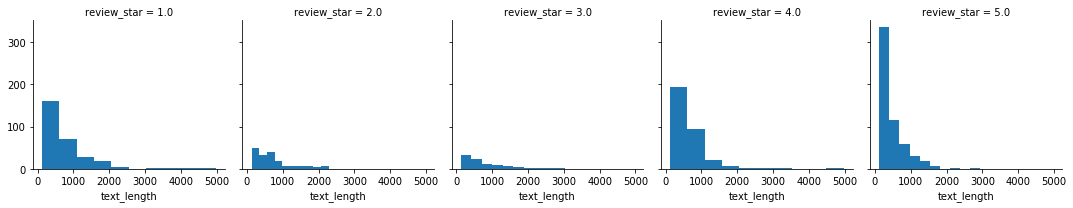

In [18]:
g1 = sns.FacetGrid(df_bar,col='review_star')
g1.map(plt.hist,'text_length')

In [19]:
df_bar.groupby('review_star')["text_length"].mean()

review_star
1.0    734.169550
2.0    734.469274
3.0    780.010309
4.0    636.609231
5.0    474.238596
Name: text_length, dtype: float64

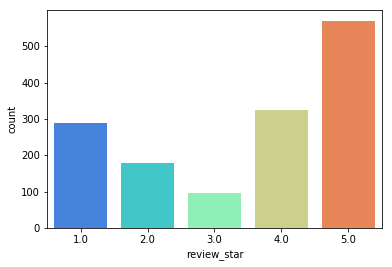

In [20]:
sns.countplot(x='review_star',data=df_bar,palette='rainbow')

In [21]:
df_bar.groupby('review_star')["reviewer_name"].count()

review_star
1.0    289
2.0    179
3.0     97
4.0    325
5.0    570
Name: reviewer_name, dtype: int64

In [22]:
df_restaurant["attitude"] = df_restaurant['review_star'].apply(attitude)

In [23]:
df_restaurant.head()

,index,Name_of_the_restaurant,review_date,reviewer_name,review_star,review_content,attitude
0,0,Au Festin de Babette,2018-05-06,John Bray,2.0,Too expensive for what they had... i had an eg...,0
1,1,Au Festin de Babette,2018-03-11,Fred Foglesong,4.0,"Very rustic place. Mismatched furniture, off K...",1
2,2,Au Festin de Babette,2018-02-18,Patricia Kazunas,5.0,I highly recommend Au Festin de Babette for th...,1
3,3,Au Festin de Babette,2018-02-12,Destiny Keams,3.0,Amazing soup and dauphinoise. BUT the wait for...,0
4,4,Au Festin de Babette,2018-01-11,Sarah Green,2.0,I went here by recommendation of a friend. Tho...,0


In [24]:
df_restaurant['text_length'] = df_restaurant['review_content'].apply(len)

In [25]:
df_restaurant.head()

,index,Name_of_the_restaurant,review_date,reviewer_name,review_star,review_content,attitude,text_length
0,0,Au Festin de Babette,2018-05-06,John Bray,2.0,Too expensive for what they had... i had an eg...,0,195
1,1,Au Festin de Babette,2018-03-11,Fred Foglesong,4.0,"Very rustic place. Mismatched furniture, off K...",1,331
2,2,Au Festin de Babette,2018-02-18,Patricia Kazunas,5.0,I highly recommend Au Festin de Babette for th...,1,493
3,3,Au Festin de Babette,2018-02-12,Destiny Keams,3.0,Amazing soup and dauphinoise. BUT the wait for...,0,269
4,4,Au Festin de Babette,2018-01-11,Sarah Green,2.0,I went here by recommendation of a friend. Tho...,0,235


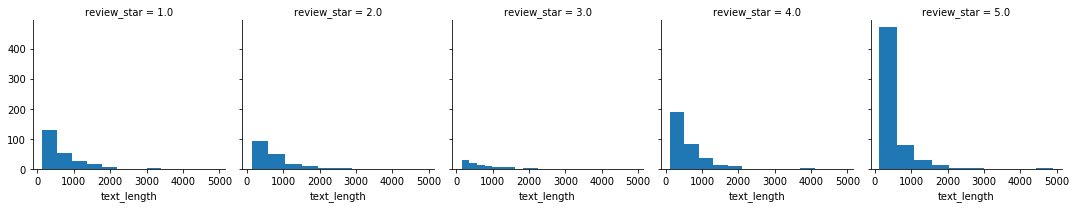

In [26]:
g2 = sns.FacetGrid(df_restaurant,col='review_star')
g2.map(plt.hist,'text_length')

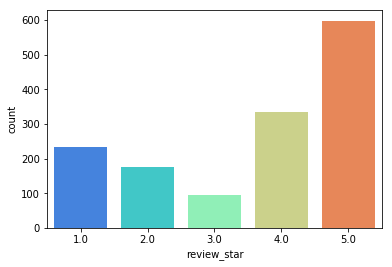

In [27]:
sns.countplot(x='review_star',data=df_restaurant,palette='rainbow')

In [28]:
df_restaurant.groupby('review_star')["reviewer_name"].count()

review_star
1.0    235
2.0    176
3.0     96
4.0    335
5.0    598
Name: reviewer_name, dtype: int64

# (III)start the machine learning process

## 1.split the training data and test data

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
from sklearn.metrics import confusion_matrix,classification_report

#### (1.1)split the data from df_bar

In [31]:
X = df_bar['review_content']
y = df_bar['attitude']

In [32]:
X_trainbar, X_testbar, y_trainbar, y_testbar = train_test_split(X, y,test_size=0.33,random_state=99)

#### (1.2)split the data from df_restaurant

In [33]:
X = df_restaurant['review_content']
y = df_restaurant['attitude']

In [34]:
X_trainres, X_testres, y_trainres, y_testres = train_test_split(X, y,test_size=0.33,random_state=99)

## 2.Using the pipline and CountVectorizer, TfidfTransformer,MultinomialNB classifier

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [36]:
from sklearn.feature_extraction.text import  TfidfTransformer

In [37]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [38]:
from sklearn.pipeline import Pipeline

In [39]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

#### (2.1)Using the pipline and CountVectorizer, TfidfTransformer,MultinomialNB on bars dataset.

In [40]:
nb_model_bar = pipeline.fit(X_trainbar,y_trainbar)

In [41]:
predictions_bar = nb_model_bar.predict(X_testbar)
nb_predictions_bar = predictions_bar

In [42]:
print("confusion matrix:")
print(confusion_matrix(y_testbar,predictions_bar))
print('\n')
print('____________________________________________________')
print('\n')
print("classification reprot:")
print(classification_report(y_testbar,predictions_bar))

confusion matrix:
[[ 45 151]
 [  0 286]]


____________________________________________________


classification reprot:
              precision    recall  f1-score   support

           0       1.00      0.23      0.37       196
           1       0.65      1.00      0.79       286

   micro avg       0.69      0.69      0.69       482
   macro avg       0.83      0.61      0.58       482
weighted avg       0.79      0.69      0.62       482



#### (2.2)Using the pipline and CountVectorizer, TfidfTransformer,MultinomialNB on restaurants dataset.

In [43]:
nb_model_res = pipeline.fit(X_trainres,y_trainres)

In [44]:
predictions_res = nb_model_res.predict(X_testres)
nb_predictions_res = predictions_res

In [45]:
print("confusion matrix:")
print(confusion_matrix(y_testres,predictions_res))
print('\n')
print('____________________________________________________')
print('\n')
print("classification reprot:")
print(classification_report(y_testres,predictions_res))

confusion matrix:
[[  8 159]
 [  0 309]]


____________________________________________________


classification reprot:
              precision    recall  f1-score   support

           0       1.00      0.05      0.09       167
           1       0.66      1.00      0.80       309

   micro avg       0.67      0.67      0.67       476
   macro avg       0.83      0.52      0.44       476
weighted avg       0.78      0.67      0.55       476



#### (2.3)Using the pipline and CountVectorizer, TfidfTransformer,MultinomialNB on a cross check.

In [46]:
# using the model train by bar data checking restaurant data
predictions_barM_on_res = nb_model_bar.predict(X_testres)

In [47]:
# using the model train by restaurant data checking bar data
predictions_resM_on_bar = nb_model_res.predict(X_testbar)

In [48]:
print("using the model train by bar data checking restaurant data")
print("confusion matrix:")
print(confusion_matrix(y_testres,predictions_barM_on_res))
print('\n')
print('____________________________________________________')
print('\n')
print("classification reprot:")
print(classification_report(y_testres,predictions_barM_on_res))
print("\n")
print("\n")

print("using the model train by restaurant data checking bar data")
print("confusion matrix:")
print(confusion_matrix(y_testbar,predictions_resM_on_bar))
print('\n')
print('____________________________________________________')
print('\n')
print("classification reprot:")
print(classification_report(y_testbar,predictions_resM_on_bar))

using the model train by bar data checking restaurant data
confusion matrix:
[[  8 159]
 [  0 309]]


____________________________________________________


classification reprot:
              precision    recall  f1-score   support

           0       1.00      0.05      0.09       167
           1       0.66      1.00      0.80       309

   micro avg       0.67      0.67      0.67       476
   macro avg       0.83      0.52      0.44       476
weighted avg       0.78      0.67      0.55       476





using the model train by restaurant data checking bar data
confusion matrix:
[[  9 187]
 [  0 286]]


____________________________________________________


classification reprot:
              precision    recall  f1-score   support

           0       1.00      0.05      0.09       196
           1       0.60      1.00      0.75       286

   micro avg       0.61      0.61      0.61       482
   macro avg       0.80      0.52      0.42       482
weighted avg       0.77      0.61    

## 3.Using the pipline and CountVectorizer, TfidfTransformer,Randomforest classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ random forest classifier
])

#### (3.1).Using the pipline and CountVectorizer, TfidfTransformer,Randomforest classifier on bar dataset.

In [51]:
rf_model_bar = pipeline.fit(X_trainres,y_trainres)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [52]:
predictions_bar = rf_model_bar.predict(X_testbar)
rf_predictions_bar = predictions_bar

In [53]:
print("confusion matrix:")
print(confusion_matrix(y_testbar,predictions_bar))
print('\n')
print('____________________________________________________')
print('\n')
print("classification reprot:")
print(classification_report(y_testbar,predictions_bar))

confusion matrix:
[[118  78]
 [ 50 236]]


____________________________________________________


classification reprot:
              precision    recall  f1-score   support

           0       0.70      0.60      0.65       196
           1       0.75      0.83      0.79       286

   micro avg       0.73      0.73      0.73       482
   macro avg       0.73      0.71      0.72       482
weighted avg       0.73      0.73      0.73       482



#### (3.2).Using the pipline and CountVectorizer, TfidfTransformer,Randomforest classifier on restaurants dataset

In [54]:
rf_model_res = pipeline.fit(X_trainres,y_trainres)

In [55]:
predictions_res = rf_model_res.predict(X_testres)
rf_predictions_res = predictions_res 

In [56]:
print("confusion matrix:")
print(confusion_matrix(y_testres,predictions_res))
print('\n')
print('____________________________________________________')
print('\n')
print("classification reprot:")
print(classification_report(y_testres,predictions_res))

confusion matrix:
[[ 81  86]
 [ 39 270]]


____________________________________________________


classification reprot:
              precision    recall  f1-score   support

           0       0.68      0.49      0.56       167
           1       0.76      0.87      0.81       309

   micro avg       0.74      0.74      0.74       476
   macro avg       0.72      0.68      0.69       476
weighted avg       0.73      0.74      0.73       476



#### (3.3)Using the pipline and CountVectorizer, TfidfTransformer,Randomforest on a cross check.

In [57]:
# using the model train by bar data checking restaurant data
predictions_barM_on_res = rf_model_bar.predict(X_testres)

In [58]:
# using the model train by restaurant data checking bar data
predictions_resM_on_bar = rf_model_res.predict(X_testbar)

In [59]:
print("using the model train by bar data checking restaurant data")
print("confusion matrix:")
print(confusion_matrix(y_testres,predictions_barM_on_res))
print('\n')
print('____________________________________________________')
print('\n')
print("classification reprot:")
print(classification_report(y_testres,predictions_barM_on_res))
print("\n")
print("\n")

print("using the model train by restaurant data checking bar data")
print("confusion matrix:")
print(confusion_matrix(y_testbar,predictions_resM_on_bar))
print('\n')
print('____________________________________________________')
print('\n')
print("classification reprot:")
print(classification_report(y_testbar,predictions_resM_on_bar))

using the model train by bar data checking restaurant data
confusion matrix:
[[ 81  86]
 [ 39 270]]


____________________________________________________


classification reprot:
              precision    recall  f1-score   support

           0       0.68      0.49      0.56       167
           1       0.76      0.87      0.81       309

   micro avg       0.74      0.74      0.74       476
   macro avg       0.72      0.68      0.69       476
weighted avg       0.73      0.74      0.73       476





using the model train by restaurant data checking bar data
confusion matrix:
[[113  83]
 [ 31 255]]


____________________________________________________


classification reprot:
              precision    recall  f1-score   support

           0       0.78      0.58      0.66       196
           1       0.75      0.89      0.82       286

   micro avg       0.76      0.76      0.76       482
   macro avg       0.77      0.73      0.74       482
weighted avg       0.77      0.76    

## 4.Using the pipline and CountVectorizer, TfidfTransformer,LogisticRegression classifier

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ logisticregression classifier
])

#### (4.1).Using the pipline and CountVectorizer, TfidfTransformer,Logistic regression classifier on bar dataset.

In [62]:
lr_model_bar = pipeline.fit(X_trainbar,y_trainbar)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [63]:
predictions_bar = lr_model_bar.predict(X_testbar)
lr_predictions_bar = predictions_bar

In [64]:
print("confusion matrix:")
print(confusion_matrix(y_testbar,predictions_bar))
print('\n')
print('____________________________________________________')
print('\n')
print("classification reprot:")
print(classification_report(y_testbar,predictions_bar))

confusion matrix:
[[118  78]
 [ 11 275]]


____________________________________________________


classification reprot:
              precision    recall  f1-score   support

           0       0.91      0.60      0.73       196
           1       0.78      0.96      0.86       286

   micro avg       0.82      0.82      0.82       482
   macro avg       0.85      0.78      0.79       482
weighted avg       0.83      0.82      0.81       482



#### (4.2).Using the pipline and CountVectorizer, TfidfTransformer,Logistic regression classifier on restaurant dataset.

In [65]:
lr_model_res = pipeline.fit(X_trainres,y_trainres)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [66]:
predictions_res = lr_model_res.predict(X_testres)
lr_predictions_res = predictions_res

In [67]:
print("confusion matrix:")
print(confusion_matrix(y_testres,predictions_res))
print('\n')
print('____________________________________________________')
print('\n')
print("classification reprot:")
print(classification_report(y_testres,predictions_res))

confusion matrix:
[[ 88  79]
 [ 10 299]]


____________________________________________________


classification reprot:
              precision    recall  f1-score   support

           0       0.90      0.53      0.66       167
           1       0.79      0.97      0.87       309

   micro avg       0.81      0.81      0.81       476
   macro avg       0.84      0.75      0.77       476
weighted avg       0.83      0.81      0.80       476



#### (4.3).Using the pipline and CountVectorizer, TfidfTransformer,Logistic regression classifier on cross check.

In [68]:
# using the model train by bar data checking restaurant data
predictions_barM_on_res = lr_model_bar.predict(X_testres)

In [69]:
# using the model train by restaurant data checking bar data
predictions_resM_on_bar = lr_model_res.predict(X_testbar)

In [70]:
print("using the model train by bar data checking restaurant data")
print("confusion matrix:")
print(confusion_matrix(y_testres,predictions_barM_on_res))
print('\n')
print('____________________________________________________')
print('\n')
print("classification reprot:")
print(classification_report(y_testres,predictions_barM_on_res))
print("\n")
print("\n")

print("using the model train by restaurant data checking bar data")
print("confusion matrix:")
print(confusion_matrix(y_testbar,predictions_resM_on_bar))
print('\n')
print('____________________________________________________')
print('\n')
print("classification reprot:")
print(classification_report(y_testbar,predictions_resM_on_bar))

using the model train by bar data checking restaurant data
confusion matrix:
[[ 88  79]
 [ 10 299]]


____________________________________________________


classification reprot:
              precision    recall  f1-score   support

           0       0.90      0.53      0.66       167
           1       0.79      0.97      0.87       309

   micro avg       0.81      0.81      0.81       476
   macro avg       0.84      0.75      0.77       476
weighted avg       0.83      0.81      0.80       476





using the model train by restaurant data checking bar data
confusion matrix:
[[115  81]
 [  5 281]]


____________________________________________________


classification reprot:
              precision    recall  f1-score   support

           0       0.96      0.59      0.73       196
           1       0.78      0.98      0.87       286

   micro avg       0.82      0.82      0.82       482
   macro avg       0.87      0.78      0.80       482
weighted avg       0.85      0.82    

## 5.Using the pipline and CountVectorizer, TfidfTransformer,linearRegression classifier

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LinearRegression()),  # train on TF-IDF vectors w/ linearRegression classifier
])

#### (5.1).Using the pipline and CountVectorizer, TfidfTransformer,linearRegression classifier on bar dataset.

In [73]:
lm_model_bar = pipeline.fit(X_trainbar,y_trainbar)

In [74]:
#round out the number to integer
predictions_bar = np.round_(lm_model_bar.predict(X_testbar))
lm_predictions_bar = predictions_bar

In [75]:
print("confusion matrix:")
print(confusion_matrix(y_testbar,predictions_bar))
print('\n')
print('____________________________________________________')
print('\n')
print("classification reprot:")
print(classification_report(y_testbar,predictions_bar))

confusion matrix:
[[  0   0   0   0]
 [  1 146  49   0]
 [  0  33 252   1]
 [  0   0   0   0]]


____________________________________________________


classification reprot:
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.82      0.74      0.78       196
         1.0       0.84      0.88      0.86       286
         2.0       0.00      0.00      0.00         0

   micro avg       0.83      0.83      0.83       482
   macro avg       0.41      0.41      0.41       482
weighted avg       0.83      0.83      0.83       482



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


#### (5.2).Using the pipline and CountVectorizer, TfidfTransformer,linearRegression classifier on Restaurant dataset.

In [76]:
lm_model_res = pipeline.fit(X_trainres,y_trainres)

In [77]:
#round out the number to integer
predictions_res = np.round_(lm_model_res.predict(X_testres))
lm_predictions_res = predictions_res

In [78]:
print("confusion matrix:")
print(confusion_matrix(y_testres,predictions_res))
print('\n')
print('____________________________________________________')
print('\n')
print("classification reprot:")
print(classification_report(y_testres,predictions_res))

confusion matrix:
[[114  53   0]
 [ 25 280   4]
 [  0   0   0]]


____________________________________________________


classification reprot:
              precision    recall  f1-score   support

         0.0       0.82      0.68      0.75       167
         1.0       0.84      0.91      0.87       309
         2.0       0.00      0.00      0.00         0

   micro avg       0.83      0.83      0.83       476
   macro avg       0.55      0.53      0.54       476
weighted avg       0.83      0.83      0.83       476



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


#### (5.3).Using the pipline and CountVectorizer, TfidfTransformer,Linear regression classifier on cross check.

In [79]:
# using the model train by bar data checking restaurant data
predictions_barM_on_res = np.round_(lm_model_bar.predict(X_testres))

In [80]:
# using the model train by restaurant data checking bar data
predictions_resM_on_bar = np.round_(lm_model_res.predict(X_testbar))

In [81]:
print("using the model train by bar data checking restaurant data")
print("confusion matrix:")
print(confusion_matrix(y_testres,predictions_barM_on_res))
print('\n')
print('____________________________________________________')
print('\n')
print("classification reprot:")
print(classification_report(y_testres,predictions_barM_on_res))
print("\n")
print("\n")

print("using the model train by restaurant data checking bar data")
print("confusion matrix:")
print(confusion_matrix(y_testbar,predictions_resM_on_bar))
print('\n')
print('____________________________________________________')
print('\n')
print("classification reprot:")
print(classification_report(y_testbar,predictions_resM_on_bar))

using the model train by bar data checking restaurant data
confusion matrix:
[[114  53   0]
 [ 25 280   4]
 [  0   0   0]]


____________________________________________________


classification reprot:
              precision    recall  f1-score   support

         0.0       0.82      0.68      0.75       167
         1.0       0.84      0.91      0.87       309
         2.0       0.00      0.00      0.00         0

   micro avg       0.83      0.83      0.83       476
   macro avg       0.55      0.53      0.54       476
weighted avg       0.83      0.83      0.83       476





using the model train by restaurant data checking bar data
confusion matrix:
[[  0   0   0   0]
 [  1 148  47   0]
 [  0  31 252   3]
 [  0   0   0   0]]


____________________________________________________


classification reprot:
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.83      0.76      0.79       196
         1.0   

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## 6.Using the pipline and CountVectorizer, TfidfTransformer,SVM classifier

In [82]:
from sklearn.svm import SVC

In [83]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVC()),  # train on TF-IDF vectors w/ SVC classifier
])

#### (6.1).Using the pipline and CountVectorizer, TfidfTransformer,SVM on bar dataset.

In [84]:
svm_model_bar = pipeline.fit(X_trainbar,y_trainbar)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [85]:
predictions_bar = svm_model_bar.predict(X_testbar)
svm_predictions_bar = predictions_bar

In [86]:
print("confusion matrix:")
print(confusion_matrix(y_testbar,predictions_bar))
print('\n')
print('____________________________________________________')
print('\n')
print("classification reprot:")
print(classification_report(y_testbar,predictions_bar))

confusion matrix:
[[  0 196]
 [  0 286]]


____________________________________________________


classification reprot:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       196
           1       0.59      1.00      0.74       286

   micro avg       0.59      0.59      0.59       482
   macro avg       0.30      0.50      0.37       482
weighted avg       0.35      0.59      0.44       482



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### (6.2).Using the pipline and CountVectorizer, TfidfTransformer,SVM on restaurant dataset.

In [87]:
svm_model_res = pipeline.fit(X_trainres,y_trainres)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [88]:
predictions_res = svm_model_res.predict(X_testres)
svm_predictions_res = predictions_res

In [89]:
print("confusion matrix:")
print(confusion_matrix(y_testres,predictions_res))
print('\n')
print('____________________________________________________')
print('\n')
print("classification reprot:")
print(classification_report(y_testres,predictions_res))

confusion matrix:
[[  0 167]
 [  0 309]]


____________________________________________________


classification reprot:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       167
           1       0.65      1.00      0.79       309

   micro avg       0.65      0.65      0.65       476
   macro avg       0.32      0.50      0.39       476
weighted avg       0.42      0.65      0.51       476



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### (6.3).Using the pipline and CountVectorizer, TfidfTransformer,SVM classifier on cross check.

In [90]:
# using the model train by bar data checking restaurant data
predictions_barM_on_res = svm_model_bar.predict(X_testres)

In [91]:
# using the model train by restaurant data checking bar data
predictions_resM_on_bar = svm_model_res.predict(X_testbar)

In [92]:
print("using the model train by bar data checking restaurant data")
print("confusion matrix:")
print(confusion_matrix(y_testres,predictions_barM_on_res))
print('\n')
print('____________________________________________________')
print('\n')
print("classification reprot:")
print(classification_report(y_testres,predictions_barM_on_res))
print("\n")
print("\n")

print("using the model train by restaurant data checking bar data")
print("confusion matrix:")
print(confusion_matrix(y_testbar,predictions_resM_on_bar))
print('\n')
print('____________________________________________________')
print('\n')
print("classification reprot:")
print(classification_report(y_testbar,predictions_resM_on_bar))

using the model train by bar data checking restaurant data
confusion matrix:
[[  0 167]
 [  0 309]]


____________________________________________________


classification reprot:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       167
           1       0.65      1.00      0.79       309

   micro avg       0.65      0.65      0.65       476
   macro avg       0.32      0.50      0.39       476
weighted avg       0.42      0.65      0.51       476





using the model train by restaurant data checking bar data
confusion matrix:
[[  0 196]
 [  0 286]]


____________________________________________________


classification reprot:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       196
           1       0.59      1.00      0.74       286

   micro avg       0.59      0.59      0.59       482
   macro avg       0.30      0.50      0.37       482
weighted avg       0.35      0.59    

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## 7.Using the pipline and CountVectorizer, TfidfTransformer, KNeighbors classifier

In [93]:
from sklearn.neighbors import KNeighborsClassifier

#### (7.1).Using pipline,countvectorizer TfidfTransformer, KNeighbors classifier and choosing the proper K value fit for bar datasets

In [94]:
error_rate = []

# setting the k from 1 to 40
for i in range(1,40):
    pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', KNeighborsClassifier(n_neighbors=i)),  # train on TF-IDF vectors w/ knn classifier
])
    knn = pipeline.fit(X_trainbar,y_trainbar)
    pred_i = knn.predict(X_testbar)
    error_rate.append(np.mean(pred_i != y_testbar))

Text(0, 0.5, 'Error Rate')

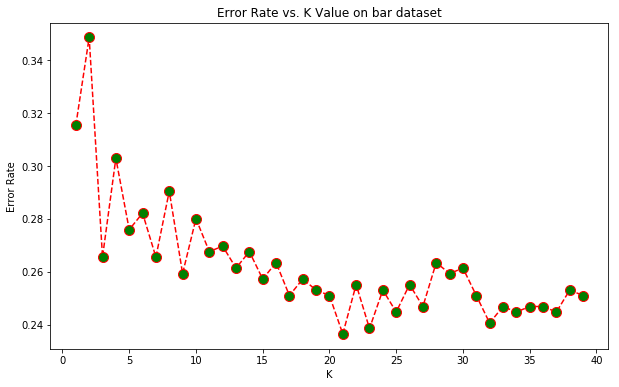

In [95]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='red', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Error Rate vs. K Value on bar dataset')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### from the graph we choose k = 21 as the most precise model

In [96]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', KNeighborsClassifier(n_neighbors=21)),  # train on TF-IDF vectors w/ knn classifier
])

In [97]:
knn_model_bar = pipeline.fit(X_trainbar,y_trainbar)

In [98]:
predictions_bar = knn_model_bar.predict(X_testbar)
knn_predictions_bar = predictions_bar

In [99]:
print("confusion matrix:")
print(confusion_matrix(y_testbar,predictions_bar))
print('\n')
print('____________________________________________________')
print('\n')
print("classification reprot:")
print(classification_report(y_testbar,predictions_bar))

confusion matrix:
[[145  51]
 [ 63 223]]


____________________________________________________


classification reprot:
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       196
           1       0.81      0.78      0.80       286

   micro avg       0.76      0.76      0.76       482
   macro avg       0.76      0.76      0.76       482
weighted avg       0.77      0.76      0.76       482



#### (7.2).Using pipline,countvectorizer TfidfTransformer, KNeighbors classifier and choosing the proper K value fit for restaurant datasets

In [100]:
error_rate = []

# setting the k from 1 to 40
for i in range(1,40):
    pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', KNeighborsClassifier(n_neighbors=i)),  # train on TF-IDF vectors w/ knn classifier
])
    knn = pipeline.fit(X_trainres,y_trainres)
    pred_i = knn.predict(X_testres)
    error_rate.append(np.mean(pred_i != y_testres))

Text(0, 0.5, 'Error Rate')

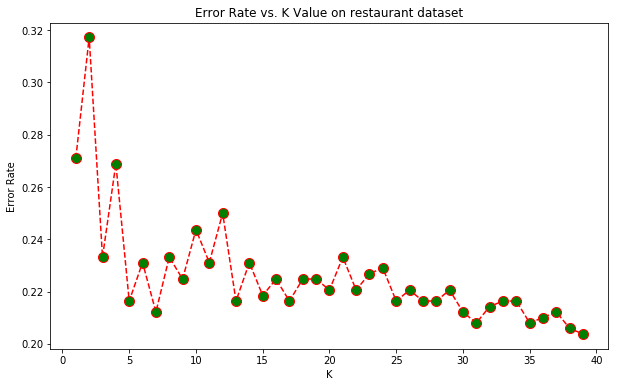

In [101]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='red', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Error Rate vs. K Value on restaurant dataset')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### from the graph we choose k = 20 as the most precise model

In [102]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', KNeighborsClassifier(n_neighbors=20)),  # train on TF-IDF vectors w/ knn classifier
])

In [103]:
knn_model_res = pipeline.fit(X_trainres,y_trainres)

In [104]:
predictions_res = knn_model_res.predict(X_testres)
knn_predictions_res = predictions_res

In [105]:
print("confusion matrix:")
print(confusion_matrix(y_testres,predictions_res))
print('\n')
print('____________________________________________________')
print('\n')
print("classification reprot:")
print(classification_report(y_testres,predictions_res))

confusion matrix:
[[120  47]
 [ 58 251]]


____________________________________________________


classification reprot:
              precision    recall  f1-score   support

           0       0.67      0.72      0.70       167
           1       0.84      0.81      0.83       309

   micro avg       0.78      0.78      0.78       476
   macro avg       0.76      0.77      0.76       476
weighted avg       0.78      0.78      0.78       476



#### (7.3).Using the pipline and CountVectorizer, TfidfTransformer,KNeighbour classifier on cross check.

In [106]:
# using the model train by bar data checking restaurant data
predictions_barM_on_res = knn_model_bar.predict(X_testres)

In [107]:
# using the model train by restaurant data checking bar data
predictions_resM_on_bar = knn_model_res.predict(X_testbar)

In [108]:
print("using the model train by bar data checking restaurant data")
print("confusion matrix:")
print(confusion_matrix(y_testres,predictions_barM_on_res))
print('\n')
print('____________________________________________________')
print('\n')
print("classification reprot:")
print(classification_report(y_testres,predictions_barM_on_res))
print("\n")
print("\n")

print("using the model train by restaurant data checking bar data")
print("confusion matrix:")
print(confusion_matrix(y_testbar,predictions_resM_on_bar))
print('\n')
print('____________________________________________________')
print('\n')
print("classification reprot:")
print(classification_report(y_testbar,predictions_resM_on_bar))

using the model train by bar data checking restaurant data
confusion matrix:
[[135  32]
 [ 87 222]]


____________________________________________________


classification reprot:
              precision    recall  f1-score   support

           0       0.61      0.81      0.69       167
           1       0.87      0.72      0.79       309

   micro avg       0.75      0.75      0.75       476
   macro avg       0.74      0.76      0.74       476
weighted avg       0.78      0.75      0.76       476





using the model train by restaurant data checking bar data
confusion matrix:
[[172  24]
 [ 78 208]]


____________________________________________________


classification reprot:
              precision    recall  f1-score   support

           0       0.69      0.88      0.77       196
           1       0.90      0.73      0.80       286

   micro avg       0.79      0.79      0.79       482
   macro avg       0.79      0.80      0.79       482
weighted avg       0.81      0.79    

## 8.plot the heatmap and give the conclusion

In [109]:
df_bar_result = pd.DataFrame({'originoal_text_data': y_testbar,
                        'nb_prediction': nb_predictions_bar,
                        'rf_prediction': rf_predictions_bar,
                        'lr_prediction': lr_predictions_bar,
                        'lm_prediction': lm_predictions_bar,
                        'svm_prediction': svm_predictions_bar,
                        'knn_prediction': knn_predictions_bar,     
                        })


In [110]:
df_restaurant_result = pd.DataFrame({'originoal_text_data': y_testres,
                        'nb_prediction': nb_predictions_res,
                        'rf_prediction': rf_predictions_res,
                        'lr_prediction': lr_predictions_res,
                        'lm_prediction': lm_predictions_res,
                        'svm_prediction': svm_predictions_res,
                        'knn_prediction': knn_predictions_res,     
                        })


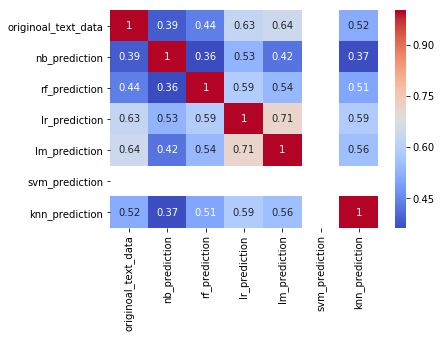

In [111]:
sns.heatmap(df_bar_result.corr(),cmap='coolwarm',annot=True)

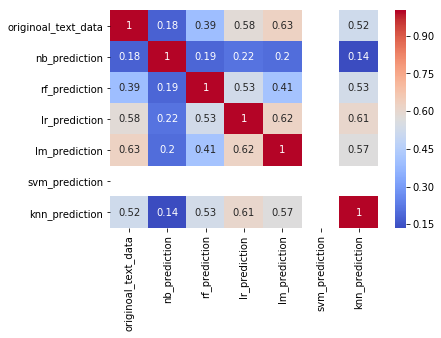

In [112]:
sns.heatmap(df_restaurant_result.corr(),cmap='coolwarm',annot=True)

### (1) I am using 6 different classifiers to predict the reviewer's attitute on bars and restaurants 
### (2) across all those classifiers, the linear regression model tend to have the best result on both datasets (both showed in the classification report and heatmap)
### (3) the svm model tend to have the worest result on both datasets, the precision is below 50% basially classify all the data into the same category .
### (4) further steps can be taken to conduct better result like creating a custom analyzer( normalize the text).

# (IV)put the two different scraped datasets into csv file.

In [181]:
df_bar.to_csv('bar.csv',index=False)

In [182]:
df_restaurant.to_csv('restaurant.csv',index=False)